# Future Prediction of 50 records using logit ,KNN,SVM and GaussianNB

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Reading and spliting the data

In [2]:
df = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.Classification\20th- Naive bayes\Social_Network_Ads.csv")

X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Scaling the data

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Generating 4 objects of the classification models

In [4]:
# models
from sklearn.linear_model import LogisticRegression
model_LG = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
model_KN = KNeighborsClassifier()

from sklearn.svm import LinearSVC
model_SV = LinearSVC()

from sklearn.naive_bayes import BernoulliNB
model_NB = BernoulliNB()

from sklearn.metrics import accuracy_score, recall_score

models = {
    'Logistic Regressor': model_LG, 
    'KNN': model_KN, 
    'SVM': model_SV, 
    'Naive Bayes': model_NB }

## Calculating accuracy and recall for testing data

In [5]:
for model_id, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'the acuracy for {model_id} is {accuracy_score(y_test,y_pred)}')
    print(f'the recall for {model_id} is {recall_score(y_test,y_pred)}')
    print('-'*50)

the acuracy for Logistic Regressor is 0.925
the recall for Logistic Regressor is 0.7727272727272727
--------------------------------------------------
the acuracy for KNN is 0.95
the recall for KNN is 0.9545454545454546
--------------------------------------------------
the acuracy for SVM is 0.925
the recall for SVM is 0.7727272727272727
--------------------------------------------------
the acuracy for Naive Bayes is 0.825
the recall for Naive Bayes is 0.5
--------------------------------------------------


## Ploting the decision areas

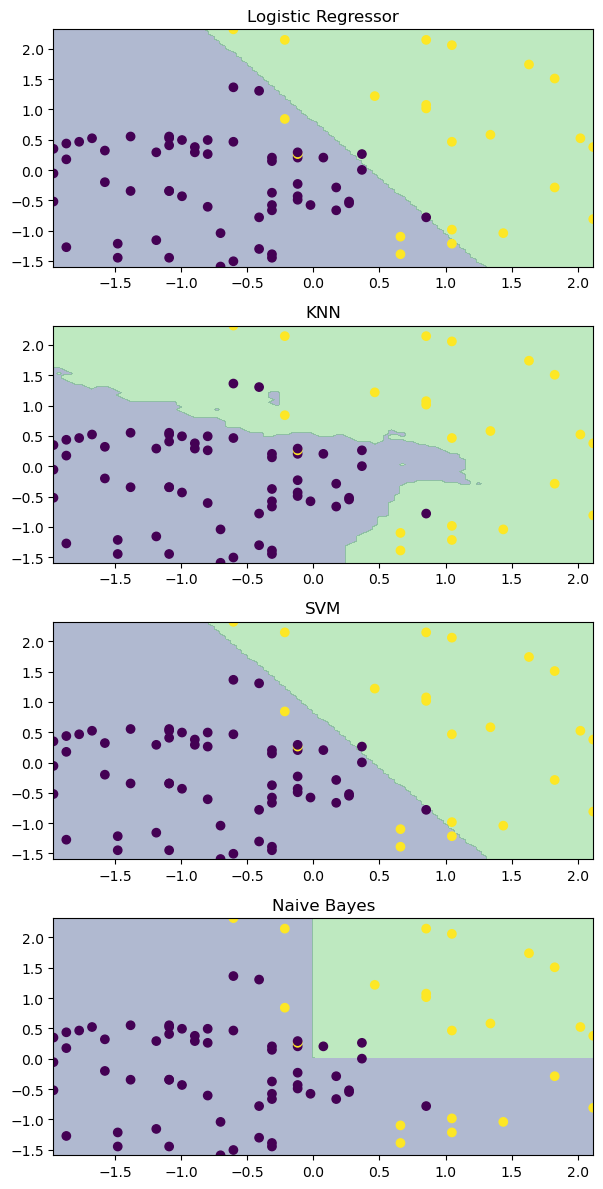

In [6]:
a = np.linspace(np.min(X_train[:,0]),np.max(X_train[:,0]),100)
b = np.linspace(np.min(X_train[:,1]),np.max(X_train[:,1]),100)
aa, bb = np.meshgrid(a,b)
fig, ax = plt.subplots(len(models),figsize=(6,12),layout='tight')
c=0
for model_id, model in models.items():
    z = model.predict(np.array([aa.ravel(),bb.ravel()]).transpose()).reshape(len(a),len(b))
    ax[c].contourf(aa,bb,z,levels=1,cmap='viridis',alpha=.4)
    ax[c].scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='viridis')
    ax[c].set_title(f'{model_id}')
    c +=1
plt.show()

## Calculating future predictions for 50 randomly generated data

In [7]:
X_0 = np.random.randint(low=np.min(X[:,0]), high=np.max(X[:,0]),size=50)  
X_1 = np.random.randint(low=np.min(X[:,1]), high=np.max(X[:,1]),size=50) 
X_gen = np.array([X_0, X_1]).transpose()

X_gen = sc.transform(X_gen)
result = {'Age':X_0, 'EstimatedSalary':X_1}

for model_id, model in models.items():
    y_pred_gen = model.predict(X_gen)
    result[model_id] = y_pred_gen
    
    
pd.DataFrame(result)

,Age,EstimatedSalary,Logistic Regressor,KNN,SVM,Naive Bayes
0,40,88560,1,1,1,1
1,41,30268,0,0,0,0
2,42,72146,0,0,0,1
3,46,104188,1,1,1,1
4,31,59439,0,0,0,0
5,43,76742,1,0,1,1
6,37,111280,1,1,1,0
7,46,44372,0,1,0,0
8,52,60975,1,1,1,0
9,48,41855,1,1,1,0
